In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
heart = pd.read_csv('clevelanda.csv')

In [4]:
heart.pivot_table(values = ['age','trestbps','thalach'], index = ['fps', 'class'], aggfunc = np.mean)

age     thalach    trestbps
fps class                                   
0   0      52.000000  158.581560  128.347518
    1      55.470588  145.294118  133.215686
    2      58.333333  135.444444  133.925926
    3      54.629630  129.148148  129.555556
    4      59.916667  142.000000  136.583333
1   0      56.173913  157.130435  134.782609
    1      54.250000  154.000000  133.750000
    2      57.111111  136.000000  135.000000
    3      60.625000  141.875000  155.375000
    4      57.000000  124.000000  165.000000

In [5]:
heart.shape

(303, 14)

In [6]:
heart.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


# Heart Disease Classification - Based on below parameters we need to make a statement whether a person going to get heart disease or not. Client provided with 4 Values (1,2,3,4) Presence of HD and 0 Abse of HD. 
#cp-- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic(Discrete) 
#trestbps - resting blood pressure(Continuous)
#Chol - Continuous Data
#fbs - Sugar Level - discrete data
#restecg - 3 types (discrete data)
#Thalach - Maximum heart rate achieved - Continuous
#exang: exercise induced angina (1 = yes; 0 = no) 
#slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping 
#thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
#ca: number of major vessels (0-3) colored by flourosopy

In [7]:
heart.info()
#We are able to notice object data type for ca and thal columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fps       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [8]:
heart.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [9]:
heart['ca'].value_counts()
#We are able to notice 4 '?' values in ca column, What to do?

0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

In [10]:
heart['thal'].value_counts()
#We are able to notice 2 '?' values in thal column, What to do?

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

In [11]:
heart['class'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: class, dtype: int64

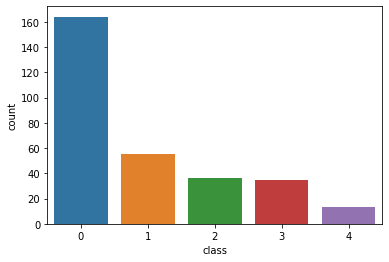

In [12]:
import seaborn as sns
sns.countplot(heart['class'])
#Majority of the data is on 0 class which represent absence of heart dies. So our model may get good accuracy on class 0 over other classes

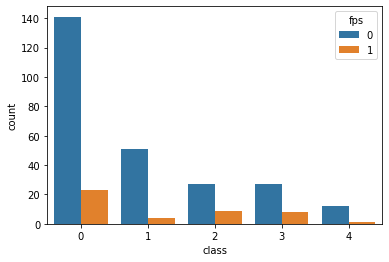

In [13]:
sns.countplot(heart['class'], hue = heart['fps'])

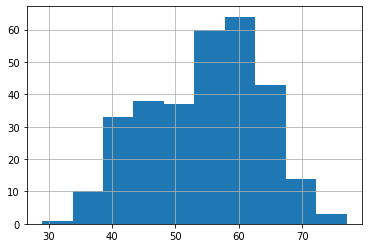

In [14]:
heart['age'].hist()

In [15]:
heart['age'].describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [16]:
heart.pivot_table(values=["age"], index=["class","gender"], aggfunc=np.mean)

age
class gender           
0     0       54.555556
      1       51.043478
1     0       60.333333
      1       54.413043
2     0       55.285714
      1       58.689655
3     0       59.857143
      1       55.035714
4     0       64.000000
      1       58.909091

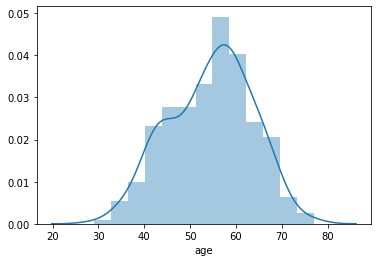

In [17]:
sns.distplot(heart['age'])

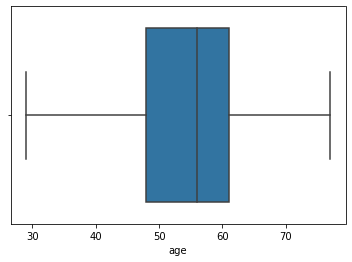

In [20]:
sns.boxplot(heart['age'])

In [21]:
heart['age'].describe()

#We are able to identify pat ranges from 29 age group to 77 age group but majority of data was concentrated across 
#56 to 61 age group. Is this data same as like your population?

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [22]:
from scipy.stats import skew
from scipy.stats import kurtosis
print(skew(heart['age']))
print(kurtosis(heart['age']))
#We are able to notice -ve skewness and -ve kurtosis we may address less amount of accuracy due to insufficient data
#We can expect skewed prediction majority of right prediction may happen around 56 to 61 age group.

-0.2080240895050745
-0.5345227201725988


In [23]:
print(heart)

     age  gender  cp  trestbps  chol  fps  restecg  thalach  exang  oldpeak  \
0     63       1   1       145   233    1        2      150      0      2.3   
1     67       1   4       160   286    0        2      108      1      1.5   
2     67       1   4       120   229    0        2      129      1      2.6   
3     37       1   3       130   250    0        0      187      0      3.5   
4     41       0   2       130   204    0        2      172      0      1.4   
..   ...     ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45       1   1       110   264    0        0      132      0      1.2   
299   68       1   4       144   193    1        0      141      0      3.4   
300   57       1   4       130   131    0        0      115      1      1.2   
301   57       0   2       130   236    0        2      174      0      0.0   
302   38       1   3       138   175    0        0      173      0      0.0   

     slope ca thal  class  
0        3  0    6     

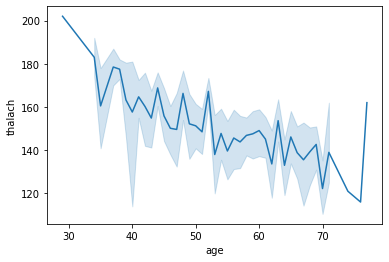

In [24]:
sns.lineplot(x = heart['age'], y = heart['thalach'])

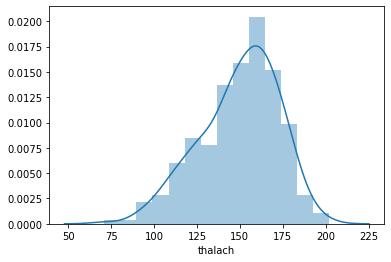

In [25]:
sns.distplot(heart['thalach'])

In [26]:
heart['thalach'].describe()

count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [27]:
heart.pivot_table(values=["thalach","trestbps","age"], index=["class","gender"], aggfunc=np.mean)

age     thalach    trestbps
class gender                                   
0     0       54.555556  154.027778  128.736111
      1       51.043478  161.782609  129.652174
1     0       60.333333  152.777778  139.888889
      1       54.413043  144.586957  131.956522
2     0       55.285714  127.714286  144.857143
      1       58.689655  137.482759  131.620690
3     0       59.857143  148.857143  156.000000
      1       55.035714  127.857143  130.321429
4     0       64.000000  134.000000  150.000000
      1       58.909091  141.818182  136.727273

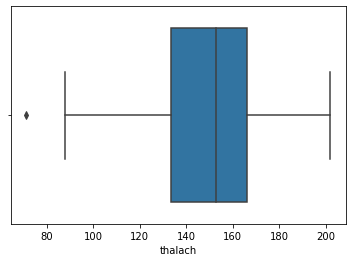

In [28]:
sns.boxplot(heart['thalach'])

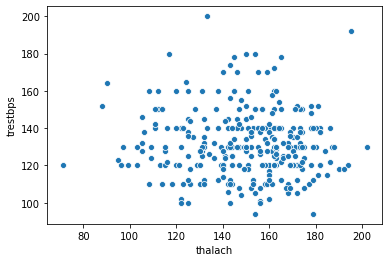

In [29]:
sns.scatterplot(x = heart['thalach'], y = heart['trestbps'])

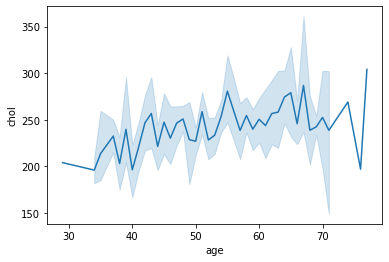

In [30]:
sns.lineplot(x = heart['age'], y = heart['chol'])

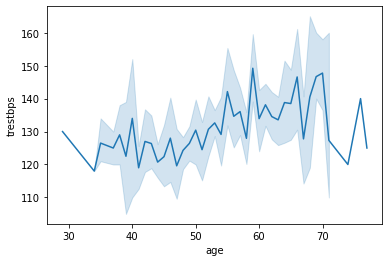

In [31]:
sns.lineplot(x = heart['age'], y = heart['trestbps'])

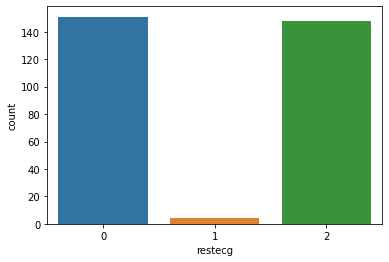

In [32]:
sns.countplot(heart['restecg'])

In [33]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [39]:
df = heart.iloc[:,[0,3]]
df.head()

,age,trestbps
0,63,145
1,67,160
2,67,120
3,37,130
4,41,130


In [37]:
heart.iloc[3:5, [0,1,2,3,4]]

,age,gender,cp,trestbps,chol
3,37,1,3,130,250
4,41,0,2,130,204


In [40]:
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 55.7173913  142.5326087 ]
 [ 47.11688312 112.85714286]
 [ 56.6952381  125.97142857]
 [ 61.65517241 168.        ]]


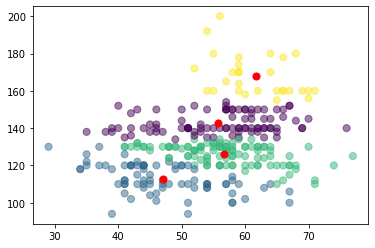

In [41]:
print(plt.scatter(df['age'], df['trestbps'], c= kmeans.labels_.astype(float), s=50, alpha=0.5))
print(plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50))

In [42]:
heart.dropna(axis=0)

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [43]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fps       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [44]:
heart = heart.replace('?', np.nan)

In [45]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fps       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    object 
 12  thal      301 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [46]:
heart.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fps         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
class       0
dtype: int64

In [47]:
heart = heart.dropna()

In [48]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   gender    297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fps       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  class     297 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 34.8+ KB


In [49]:
heart['ca'].value_counts()

0    174
1     65
2     38
3     20
Name: ca, dtype: int64

In [50]:
heart['ca'] = pd.to_numeric(heart['ca'])

In [51]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   gender    297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fps       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    object 
 13  class     297 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 34.8+ KB


In [52]:
heart['thal'] = pd.to_numeric(heart['thal'])

In [53]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   gender    297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fps       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  class     297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


In [58]:
#taking all columns except the last one 
X = heart.iloc[:,:13]

In [59]:
X.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [60]:
#storing last column - class values
y = heart.iloc[:,13:]

In [61]:
y.head()

,class
0,0
1,2
2,1
3,0
4,0


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2)

In [63]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(237, 13)
(237, 1)
(60, 13)
(60, 1)


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [65]:
#Training
#model = LogisticRegression()
#model = neighbors.KNeighborsClassifier()
#model = DecisionTreeClassifier()
model = SVC(kernel='linear',  gamma = 10, C= 1)
#model = RandomForestClassifier()
#model = AdaBoostClassifier()


model.fit(X_train,y_train)

C:\Users\indianrenters\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1, gamma=10, kernel='linear')

In [66]:
predicted = model.predict(X_test)
predicted

array([2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 2, 0, 3, 4, 0, 0,
       3, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 3, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2,
       3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0], dtype=int64)

In [67]:
#Accuracy Score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predicted)

0.5333333333333333

In [68]:
#Confusion Matrix
print(metrics.confusion_matrix(y_test, predicted))

[[25  3  3  0  0]
 [ 7  3  1  1  1]
 [ 2  0  3  1  0]
 [ 1  1  4  1  1]
 [ 0  1  0  1  0]]


In [69]:
#Classification Report
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        31
           1       0.38      0.23      0.29        13
           2       0.27      0.50      0.35         6
           3       0.25      0.12      0.17         8
           4       0.00      0.00      0.00         2

    accuracy                           0.53        60
   macro avg       0.32      0.33      0.31        60
weighted avg       0.51      0.53      0.51        60



In [70]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = model, X = X,\
     y = y, cv = 10)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))

C:\Users\indianrenters\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\indianrenters\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\indianrenters\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\indianrenters\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Accuracy Mean 0.6094252873563218 Accuracy Variance      0.0685423800842801


In [72]:
#Saving Model
import pickle

pickle.dump(model, open("model.pkl", "wb" ))

my_scaler = pickle.load(open("model.pkl", "rb" ))

predictions = my_scaler.predict(X_test)

In [73]:
predictions

array([2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 2, 0, 3, 4, 0, 0,
       3, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 3, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2,
       3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0], dtype=int64)